In [3]:
import matplotlib.pyplot as plt
import numpy as np
import os

In [4]:
m_x=np.loadtxt('mnist_x',delimiter=' ')

In [5]:
m_y=np.loadtxt('mnist_y')

800
[993 859 298 553 672 971  27 231 306 706 496 558 784 239 578  55 906 175
  14  77  31 481 310 311 883 788  45 103 760   1 823 710 614 790 408 736
 957 366 918 267 230 996 635 698 251 783 819 141 316 587 331 295 262 432
 862 582 272 270 987 319 569 643 142 202 413 196 264 531 252 576 738 299
 740 247 926 412 389 796 601 654 261 456 386 982 909 693 236 501 497 874
 452 494 923 279 638 485 568 108 367 644 785 873  65 902 317 636 666 789
 958 214  97 583 466 523 255 385 545 382 489 513 780 904 122 946  60 844
 372 283 939 608 495 630 596 713 753 624 312   8 529 876 101 615 520 249
 278 424 384 395  54  34 271  30 403 757 975 990 457 362 860 483 580 986
 688 864 927 378 320 942 351 418 945 795 145 826 492 751 240 648 886 144
 767 999 467 315 989 922 717 458 773 204 834 832 435   5 769 679 722 215
 653 150 687 500 332 979 817 620 814 516 518 940 113 612  37 894 895 992
 158 154  40 585 805 592 964 266 406 294 604 522  18 425 527 308 622 794
  62  79 680 193 750 181 535 484 200 364 991 46

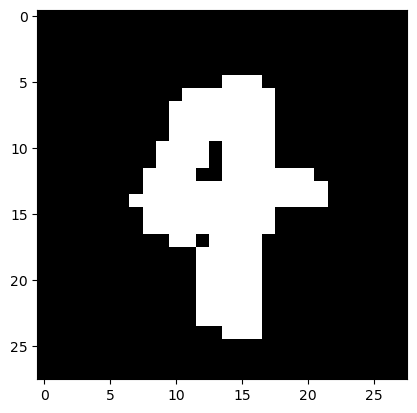

In [8]:
data=np.reshape(np.array(m_x[0],int),[28,28])
# 创建一个图形床口用来配置属性
plt.figure()
plt.imshow(data,cmap='gray')
ratio=0.8
split=int(len(m_x)*ratio)
print(split)
np.random.seed(0)
# 对数据随机排列
idx=np.random.permutation(np.arange(len(m_x)))
m_x=m_x[idx]
m_y=m_y[idx]
print(m_x)
x_train,x_test=m_x[:split],m_x[split:]
y_train,y_test=m_y[:split],m_y[split:]

In [86]:
def distance(a,b):
    # a,b 间直线距离 
    return np.sqrt(np.sum(np.square(a-b)))
class KNN:
    def __init__(self,k,label_num):
        self.k=k
        self.label_num=label_num
    def fit(self,x_train,y_train):
        # 在类中保存训练数据
        self.x_train=x_train
        self.y_train=y_train
    def get_knn_indices(self,x):
        # 获取距离目标样本点最近的k个样本点的标签
        # 计算已知样本的距离
        # 确定 x_train 和 x 距离
        dis=list(map(lambda a:distance(a,x),self.x_train))
        print(dis)
        #按照距离排序，并得到对应下标
        knn_indices=np.argsort(dis)
        #去最近k个
        knn_indices=knn_indices[:self.k]
        return knn_indices
    def get_label(self,x):
        '''
        x：待分类样本
        获取分类样本周边的已分类样本
        label 中记录周围样本类别
        label_statistic[label]+=1 对不同类别进行技术
        然后返回类别最多的下标索引
        '''
        knn_indices=self.get_knn_indices(x)
        label_statistic=np.zeros(shape=[self.label_num])
        for i in knn_indices:
            # 获取训练样例的标签
            label=int(self.y_train[i])
            # 对这种标签进行计数，即统计某个分类的数量
            label_statistic[label]+=1
        # 返回数量最多的类别
        return np.argmax(label_statistic)
    def predict(self,x_text):
        predicted_test_labels = np.zeros(shape = [len(x_test)],dtype=int)
        for i ,x in enumerate(x_test):
            # 便利测试样本，获取类别
            predicted_test_labels[i] =self.get_label(x)
        return predicted_test_labels
for k in range(1,10):
    knn=KNN(k,10)
    knn.fit(x_train,y_train)
    predicted_labels =knn.predict(x_test)
    accuracy=np.mean(predicted_labels==y_test)
    print(f'K: {k},预测准确率为{accuracy*100:.1f}%')
# 整体流程 通过判断测试集中每个数据在k个已训练样本的范围内的分类情况，确定 测试集每个测试样本的类类别
# 分类过程中，首先初始化 已训练的样本和他们的标签集
# 找出测试集中每个需要分类的周边的k个样本
# 确定k样本中类别最大值的索引，便利所有测试集，完成处理

K: 1,预测准确率为85.5%
K: 2,预测准确率为86.0%
K: 3,预测准确率为85.5%
K: 4,预测准确率为85.5%
K: 5,预测准确率为86.0%
K: 6,预测准确率为84.5%
K: 7,预测准确率为85.0%
K: 8,预测准确率为84.0%
K: 9,预测准确率为84.5%


In [3]:
print(311)

311
